<a href="https://colab.research.google.com/github/adwitaarora/ai-hw-lab/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **STROKE PREDICTION MODEL**

### **Introduction:**

According to the World Health Organization (WHO), Stroke is ranked as the 2nd leading cause of death worldwide, and causes approximately 11% of total deaths. Therefore, it is important to identify the possible risk factors for stroke. This dataset is used to answer a classification question of whether a patient is likely to get a stroke based on the input parameters age, hypertension, heart disease, and average glucose level. In this dataset "healthcare-dataset-stroke-data.csv", each row in the data provides relevant information and an observation about the patient. Moreover, each column of the table represents a particular variable, and each row corresponds to the record of a patient in this dataset.

Previous literature has explored various relationships among certain qualities and stroke. Hypertension has been the single most important risk factor for all types of stroke: ischemic stroke, intracerebral hemorrhage, and aneurysmal subarachnoid hemorrhage. Epidemiologic studies (Dubow, 2011) over the past 30 years have demonstrated a dramatic reduction in the incidence and mortality of all stroke types with good control of hypertension, and it appears that all effective antihypertensive agents have similar efficacy in their ability to reduce stroke risk. As established in Soriano-Tárraga (2021) patients with stroke recurrence were biologically older than those without stroke recurrence. Thus creating a predictive model for stroke is incredibly important.

### **Exploratory Data Analysis**

The dataset includes 12 columns. Except the columns for id and stroke, there are 10 variables that could be possible predictors of stroke: age, hypertension, heart disease, average glucose level, BMI, smoking status, marriage status, work type and residence type.Through conducting initial visualizations we determined which aforementioned predictors are to be used in our model and discovered the following:

- Average Glucose Level: As seen in figure 1, a relationship is established between average glucose level and stroke. As average glucose level became greater, there were more blue coloured (stroke) points, while a low average glucose level showed greater amounts of red (no stroke) points. Thus, average glucose level is a good predictor.
- Age: there seems to be a significant relationship between age and stroke (figure 2). Usually older people above the age of 60 are much more likely to have a stroke compared to people below the age of 60 who are much less likely to have a stroke. Thus age is a good predictor.
- Hypertension: as seen in the histogram (figure 3), we can see that the proportion of people who have stroke is much higher in people who already have hypertension. Thus hypertension is a good predictor.
- Heart Disease: there seems to be a significant relationship between age and stroke (figure 3). Those with preexisting heart disease are at a higher chance of also having a stroke. Therefore heart disease is a good predictor.
- BMI: BMI was not a good predictor for stroke, as seen in figure 1. If BMI was an effective predictor, the graph would show a greater number of red (stroke) dots as the value got larger. Instead the distribution was fairly random.
- Smoking status: while there does seem to be some relationship between it did not seem significant enough to be included in our model. (figure 4)
- Marriage Status: there was virtually not relation between stroke and marriage status, and any relation could be explained as a relationship with age and marriage status, as those more likely married are more likely (figure 5)
- Work type: Work type does not seem to have any relationship with heart stroke as is clearly evident from the bar graph. (figure 6)
- Residence type: Residence type does not seem to have any relationship with heart stroke as is clearly evident from the bar graph. (figure 7)
- Gender:  Gender does not seem to have any relationship with heart stroke as it is clearly evident from the bar graph. Men and women seem to have a similar chance of stroke. (figure 8)
In conclusion, age, hypertension, heart disease and average glucose level seem to be more strongly related to stroke than other factors, thus we choose these three as predictors in our classifier.

In [61]:
library(tidyverse)
library(testthat)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
library(readr)

In [66]:
# set.seed is used to make our analysis to be reproducible, i.e., produce the same result each time we run it, 
# due to which we only use set.seed exactly once at the beginning of the analysis.

# set the seed
set.seed(1234)

# used to load the data from the original source on the web
url <- "https://raw.githubusercontent.com/Jai12396/Stroke-Detection/main/healthcare-dataset-stroke-data.csv?token=GHSAT0AAAAAAB6QK6PCNT6XDYM5QOAGS57IY7JEKVQ"

# load data
stroke_data <- read_csv(url)

head(stroke_data)

Rows: 1903 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): gender, ever_married, work_type, Residence_type, bmi, smoking_status
dbl (6): id, age, hypertension, heart_disease, avg_glucose_level, stroke

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1


In [67]:
# convert the Stroke variable from double to the factor datatype
stroke_data <- stroke_data %>% 
    mutate(stroke = as_factor(stroke))

In [68]:
# used to preview the data frame. 
# This function can make it easier to inspect the data as we have a lot of columns, 
# and it prints the data such that the columns go down the page (instead of across).

glimpse(stroke_data)

Rows: 1,903
Columns: 12
$ id                <dbl> 9046, 51676, 31112, 60182, 1665, 56669, 53882, 10434…
$ gender            <chr> "Male", "Female", "Male", "Female", "Female", "Male"…
$ age               <dbl> 67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 81, 61, 54, …
$ hypertension      <dbl> 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1…
$ heart_disease     <dbl> 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0…
$ ever_married      <chr> "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No…
$ work_type         <chr> "Private", "Self-employed", "Private", "Private", "S…
$ Residence_type    <chr> "Urban", "Rural", "Rural", "Urban", "Rural", "Urban"…
$ avg_glucose_level <dbl> 228.69, 202.21, 105.92, 171.23, 174.12, 186.21, 70.0…
$ bmi               <chr> "36.6", "N/A", "32.5", "34.4", "24", "29", "27.4", "…
$ smoking_status    <chr> "formerly smoked", "never smoked", "never smoked", "…
$ stroke            <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…


In [69]:
# pull function is used to extract a single column (stroke) and pass that into the levels function to see the categories in the stroke column.
stroke_data %>%
  pull(stroke) %>%
  levels()

[1] "0" "1"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


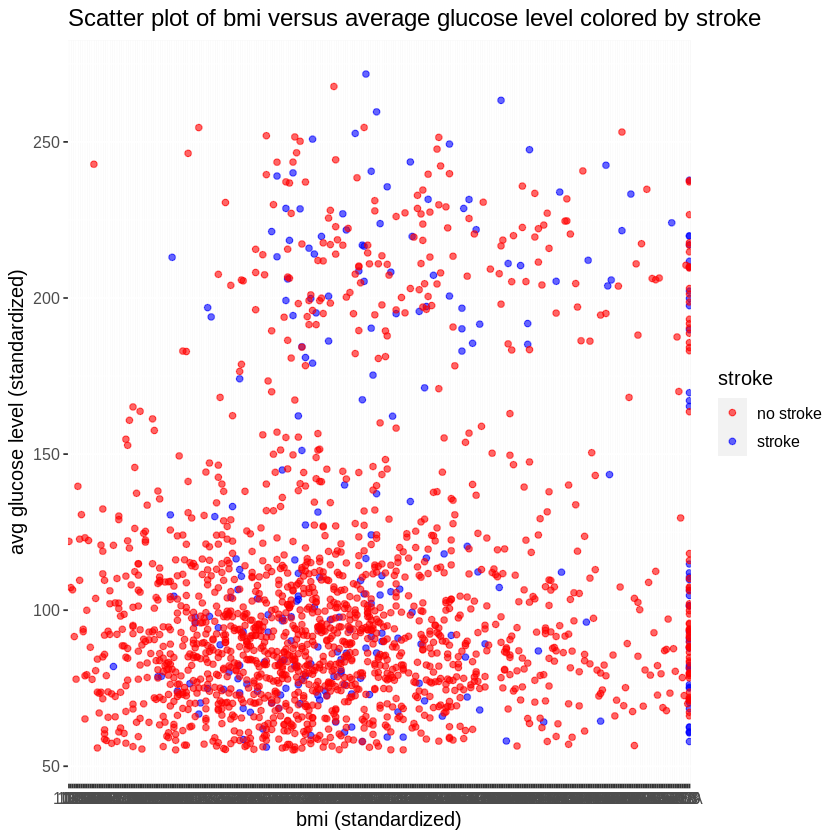

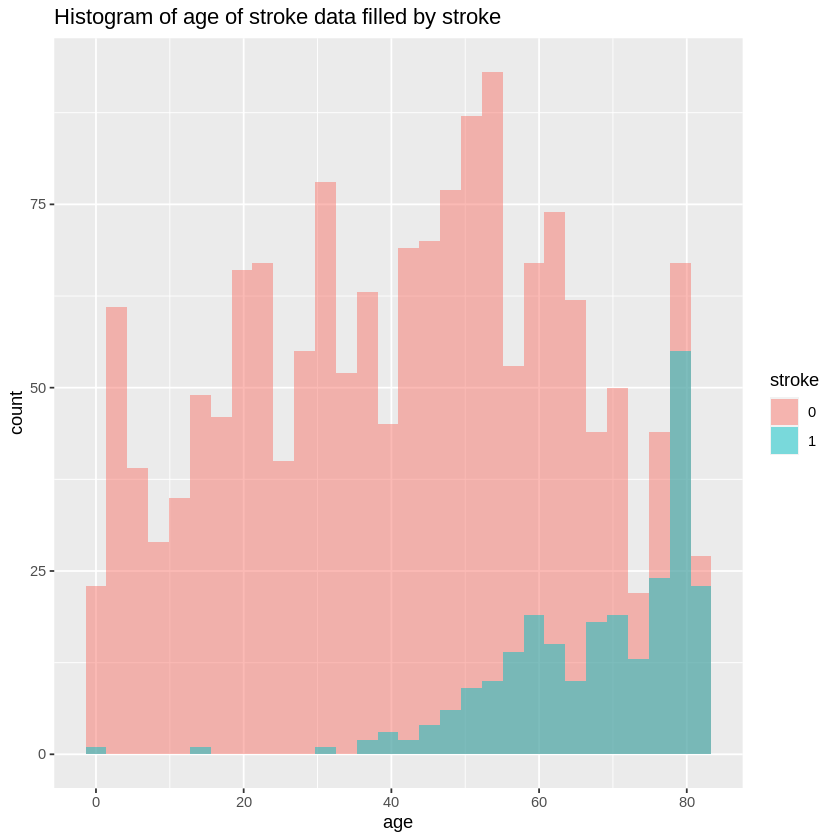

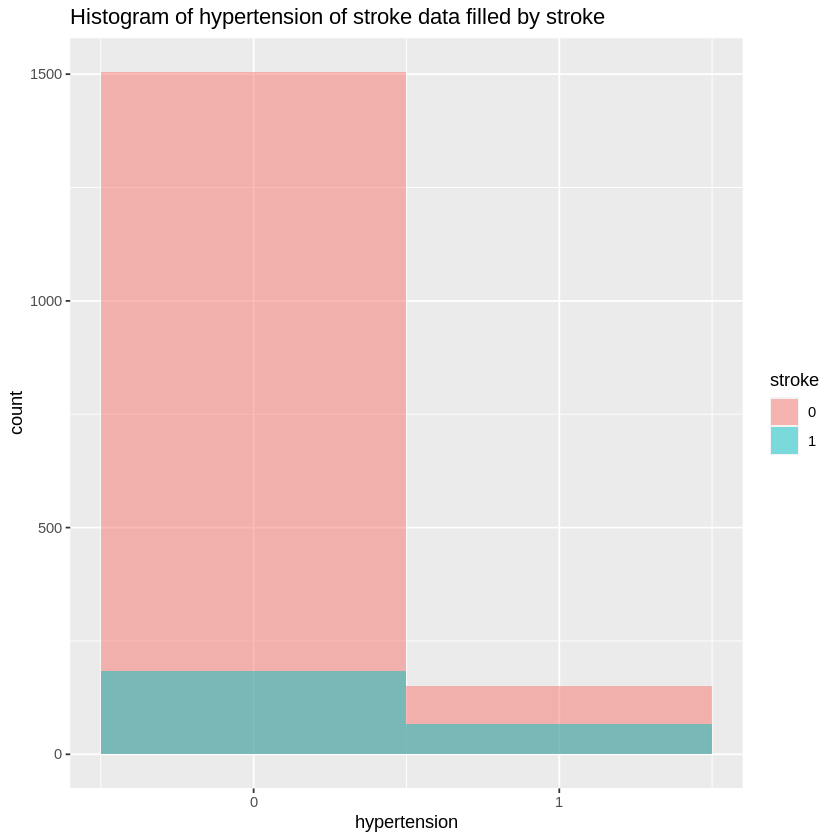

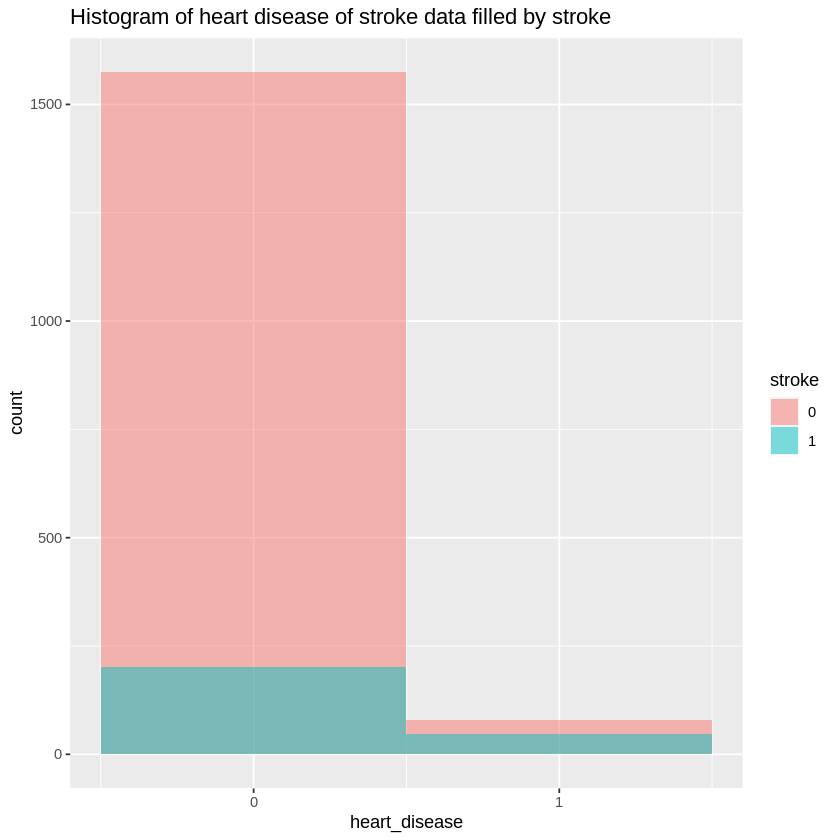

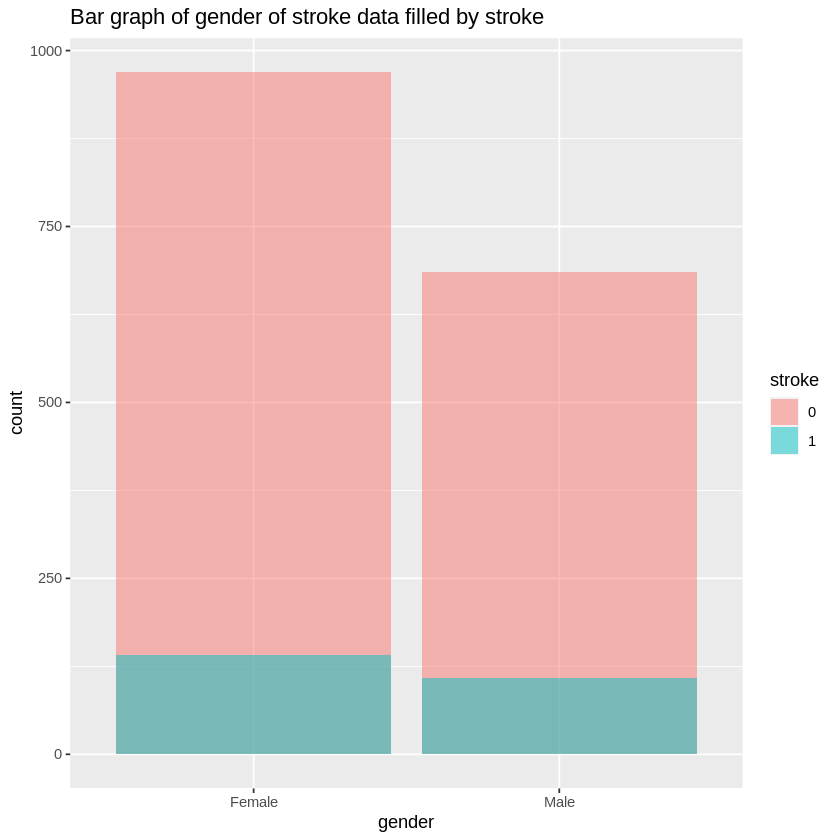

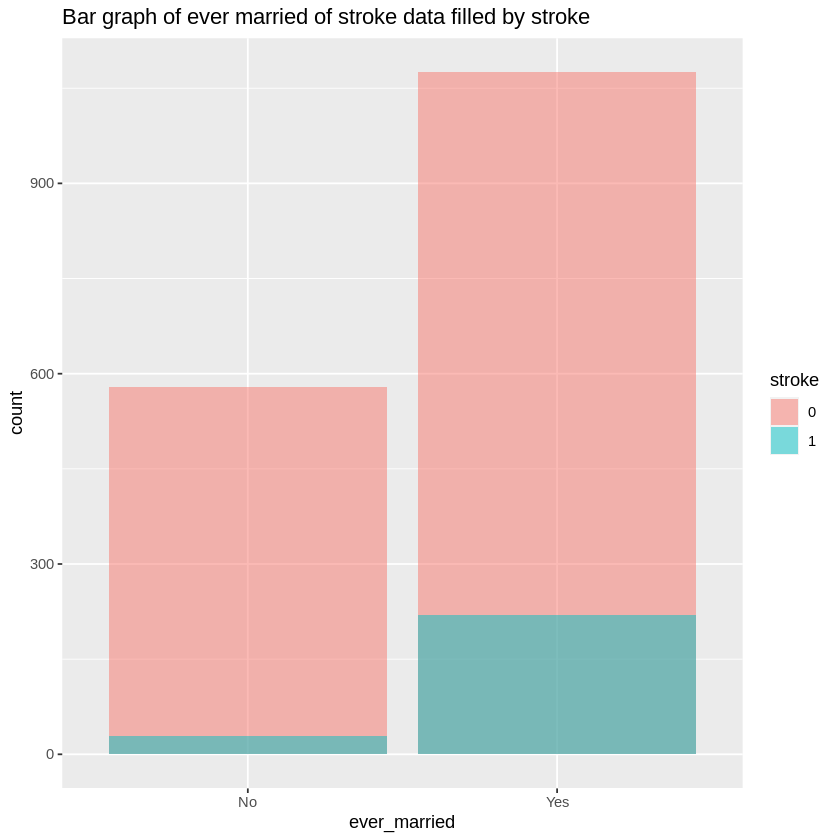

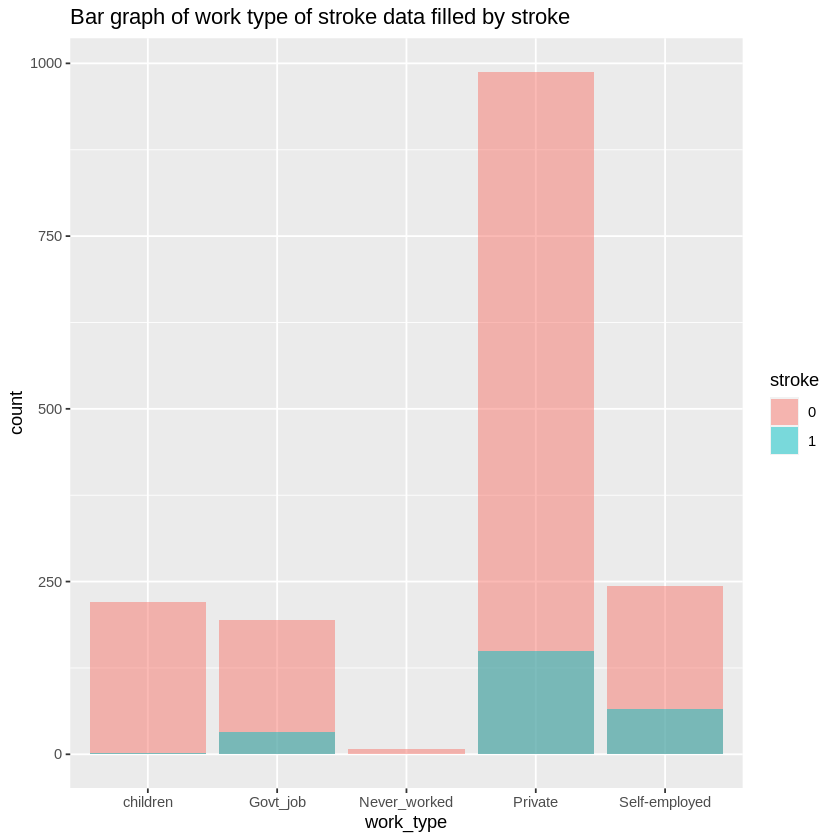

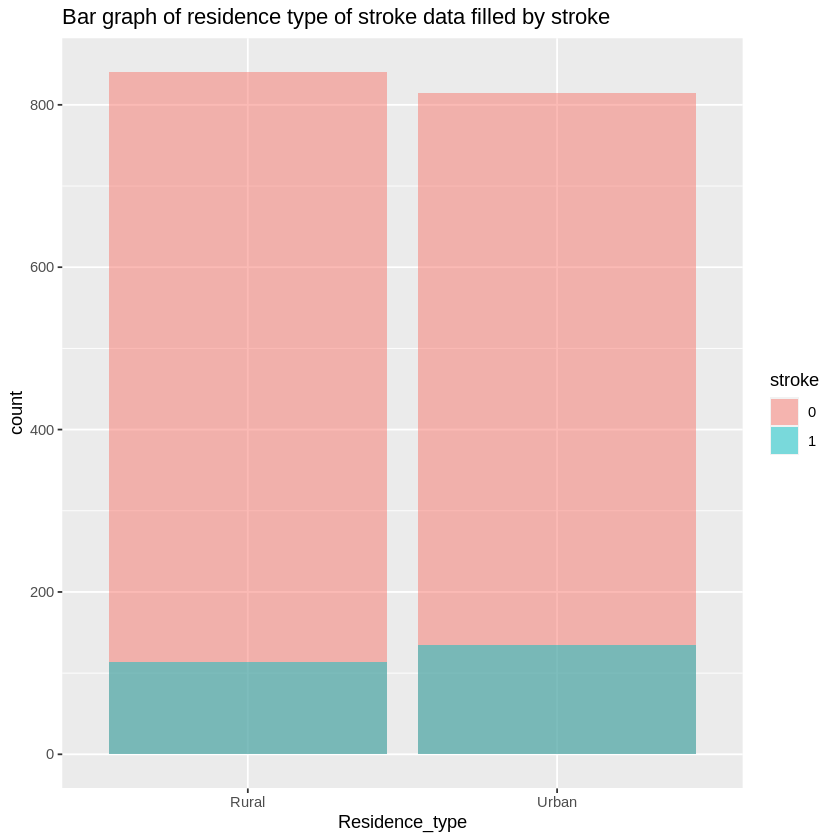

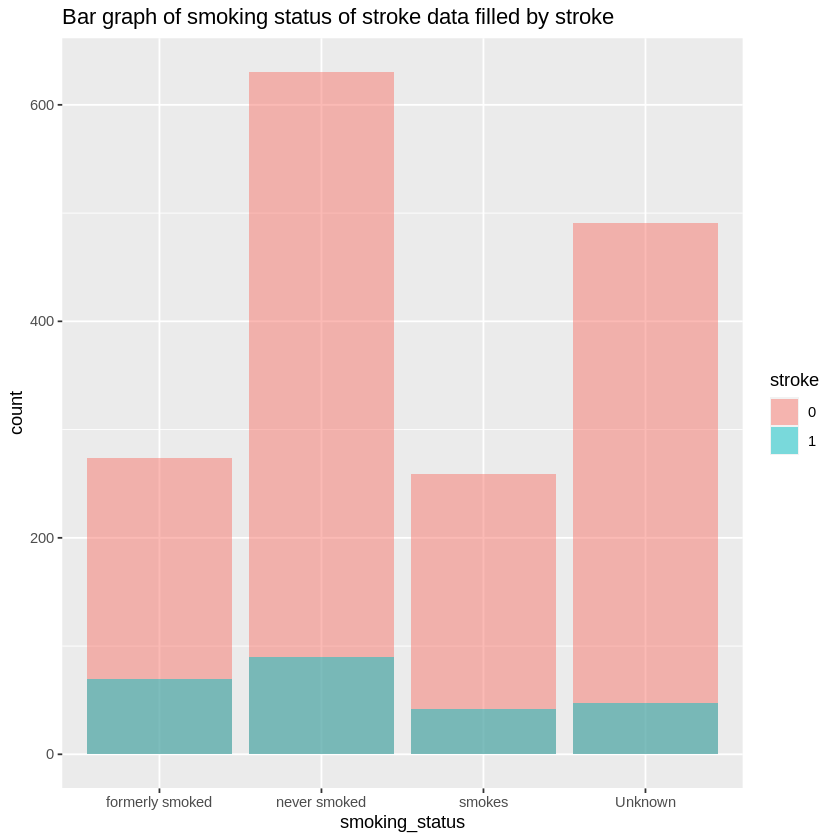

In [70]:
# Visualizations used to compare the distributions of each of the predictor variables used in our analysis
# and to check which is a good predictor variable for our data analysis.

stroke_plot_1 <- stroke_data %>%
  ggplot(aes(x = bmi, y = avg_glucose_level, color = stroke)) +
  ggtitle("Scatter plot of bmi versus average glucose level colored by stroke") +
  geom_point(alpha = 0.6) +
  labs(x = "bmi (standardized)", 
       y = "avg glucose level (standardized)",
       color = "stroke") +
  scale_color_manual(labels = c("no stroke", "stroke"), 
                     values = c("red", "blue")) +
  theme(text = element_text(size = 12))

stroke_plot_2 <- ggplot(stroke_data, aes(x = age, fill = stroke)) +
  ggtitle("Histogram of age of stroke data filled by stroke") +
  geom_histogram(alpha = 0.5, position = "identity")  

stroke_plot_3 <- ggplot(stroke_data, aes(x = hypertension, fill = stroke)) +
  ggtitle("Histogram of hypertension of stroke data filled by stroke") +
  geom_histogram(alpha = 0.5, position = "identity", binwidth=1)+
 scale_x_continuous(breaks=0:1)
 
stroke_plot_4 <- ggplot(stroke_data, aes(x = heart_disease, fill = stroke)) +
  ggtitle("Histogram of heart disease of stroke data filled by stroke") +
  geom_histogram(alpha = 0.5, position = "identity", binwidth=1)+
 scale_x_continuous(breaks=0:1)

stroke_plot_5 <- ggplot(stroke_data, aes(x = gender, fill = stroke)) +
  ggtitle("Bar graph of gender of stroke data filled by stroke") +
  geom_bar(alpha = 0.5, position = "identity") 

stroke_plot_6 <- ggplot(stroke_data, aes(x = ever_married, fill = stroke)) +
  ggtitle("Bar graph of ever married of stroke data filled by stroke") +
  geom_bar(alpha = 0.5, position = "identity")

stroke_plot_7 <- ggplot(stroke_data, aes(x = work_type, fill = stroke)) +
  ggtitle("Bar graph of work type of stroke data filled by stroke") +
  geom_bar(alpha = 0.5, position = "identity")
                                                   
stroke_plot_8 <- ggplot(stroke_data, aes(x = Residence_type, fill = stroke)) +
  ggtitle("Bar graph of residence type of stroke data filled by stroke") +
  geom_bar(alpha = 0.5, position = "identity")

stroke_plot_9 <- ggplot(stroke_data, aes(x = smoking_status, fill = stroke)) +
  ggtitle("Bar graph of smoking status of stroke data filled by stroke") +
  geom_bar(alpha = 0.5, position = "identity")
                                                   
stroke_plot_1
stroke_plot_2                                        
stroke_plot_3                                      
stroke_plot_4  
stroke_plot_5 
stroke_plot_6 
stroke_plot_7
stroke_plot_8
stroke_plot_9

In [45]:
# used to remove all the missing data (i.e., N.A.) from the original data
stroke_data <- stroke_data[!is.na(stroke_data$stroke),]

## **Data Analysis including Methods and Results**

In [47]:
# summary of the data set that is relevant for exploratory data analysis related to the planned analysis 

print("Number of observations and percentage in stroke")
num_obs <- nrow(stroke_data)
stroke_data %>%
  group_by(stroke) %>%
  summarize(
    count = n(),
    percentage = n() / num_obs * 100)

print("Means of the predictor variables used in our analysis")
stroke_data %>%
  summarize(across(age:heart_disease, \(x) mean(x, na.rm = TRUE)))

stroke_data %>%
  summarize(across(avg_glucose_level: bmi, mean, na.rm = TRUE))

print("Missing data")
stroke_data %>% 
    summarise_all(~ sum(is.na(.)))

[1] "Number of observations and percentage in stroke"


stroke,count,percentage
<fct>,<int>,<dbl>
0,1654,86.9154
1,249,13.0846


[1] "Means of the predictor variables used in our analysis"


age,hypertension,heart_disease
<dbl>,<dbl>,<dbl>
45.62642,0.113505,0.06673673


Warning message:
“There was 1 warning in `summarize()`.
ℹ In argument: `across(avg_glucose_level:bmi, mean, na.rm = TRUE)`.
Caused by warning in `mean.default()`:
! argument is not numeric or logical: returning NA”


avg_glucose_level,bmi
<dbl>,<dbl>
109.3888,NA


[1] "Missing data"


id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
# create the 25/75 split of the stroke_data into training and testing
stroke_split <- initial_split(stroke_data, prop = 0.75, strata = stroke)
stroke_training <- training(stroke_split)
stroke_testing <- testing(stroke_split)

In [49]:
# used to preview the stroke training data
glimpse(stroke_training)

Rows: 1,426
Columns: 12
$ id                <dbl> 56543, 32257, 15266, 28674, 10460, 63884, 25774, 495…
$ gender            <chr> "Female", "Female", "Female", "Female", "Female", "F…
$ age               <dbl> 70, 47, 32, 74, 79, 37, 35, 44, 79, 65, 57, 49, 59, …
$ hypertension      <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1…
$ heart_disease     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ ever_married      <chr> "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes…
$ work_type         <chr> "Private", "Private", "Private", "Self-employed", "G…
$ Residence_type    <chr> "Rural", "Urban", "Rural", "Urban", "Urban", "Rural"…
$ avg_glucose_level <dbl> 69.04, 210.95, 77.67, 205.84, 77.08, 162.96, 85.37, …
$ bmi               <chr> "35.9", "50.1", "32.3", "54.6", "35", "39.4", "33", …
$ smoking_status    <chr> "formerly smoked", "Unknown", "smokes", "never smoke…
$ stroke            <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…


In [50]:
# used to find the percentage of stroke in stroke_training,
# and we see about 87% of the training data are 0(no stroke) and about 13% are 1(stroke), 
# indicating that our stroke proportions were roughly preserved when we split the data
stroke_proportions <- stroke_training %>%
                      group_by(stroke) %>%
                      summarize(n = n()) %>%
                      mutate(percent = 100*n/nrow(stroke_training))

stroke_proportions

stroke,n,percent
<fct>,<int>,<dbl>
0,1240,86.95652
1,186,13.04348


In [51]:
# construct, prepare, and standardize the recipe using only the training data (centering and scaling the training data)
stroke_recipe <- recipe(stroke ~ age + hypertension + heart_disease + avg_glucose_level, 
                        data = stroke_training) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

In order to improve our classifier, we have one choice of parameter: the number of neighbors, K. Since cross-validation helps us evaluate the accuracy of our classifier, we can use cross-validation to calculate an accuracy for each value of K in a reasonable range, and then pick the value of K that gives us the best accuracy. 

In [52]:
# model specification is created with KNN model and classification
# tune() in the model specification is used rather than giving a particular value.
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

In [54]:
install.packages("kknn")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘igraph’




In [55]:
# performed a 10-fold cross-validation using the function: vfold_cv. 
# This function splits our training data into v folds automatically. 
# We set the strata argument to the categorical label variable (here, stroke) to ensure that the training and validation subsets contain the right proportions of each category of observation.
stroke_vfold <- vfold_cv(stroke_training, v = 10, strata = stroke)

# created a data frame with a neighbors variable that contains the sequence of values of K to try; 
# below we create the k_vals data frame with the neighbors variable containing values from 1 to 100 (stepping by 5) using the seq function. 
# Then we pass that data frame to the grid argument of tune_grid.
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

# combined the model specification and recipe into a workflow
# tune_grid function is used to fit the model for each value in a range of parameter values
# collect_metrics function is used to aggregate the mean and standard error of the classifier’s validation accuracy across the folds.
knn_results <- workflow() %>%
  add_recipe(stroke_recipe) %>%
  add_model(knn_spec) %>%
  tune_grid(resamples = stroke_vfold, grid = k_vals) %>%
  collect_metrics() 

# we use the metrics function from tidymodels to get the statistics about the quality of our model
# by using filter(mean == max(mean)) and pull(neighbors), 
# we'll get the required k value that would give us the best accuracy for our model
accuracies <- knn_results %>%
  filter(.metric == "accuracy") %>%
  filter(mean == max(mean)) %>%
  pull(neighbors)

accuracies

[1] 46 51 56 61 66 71 76 81 86 91 96

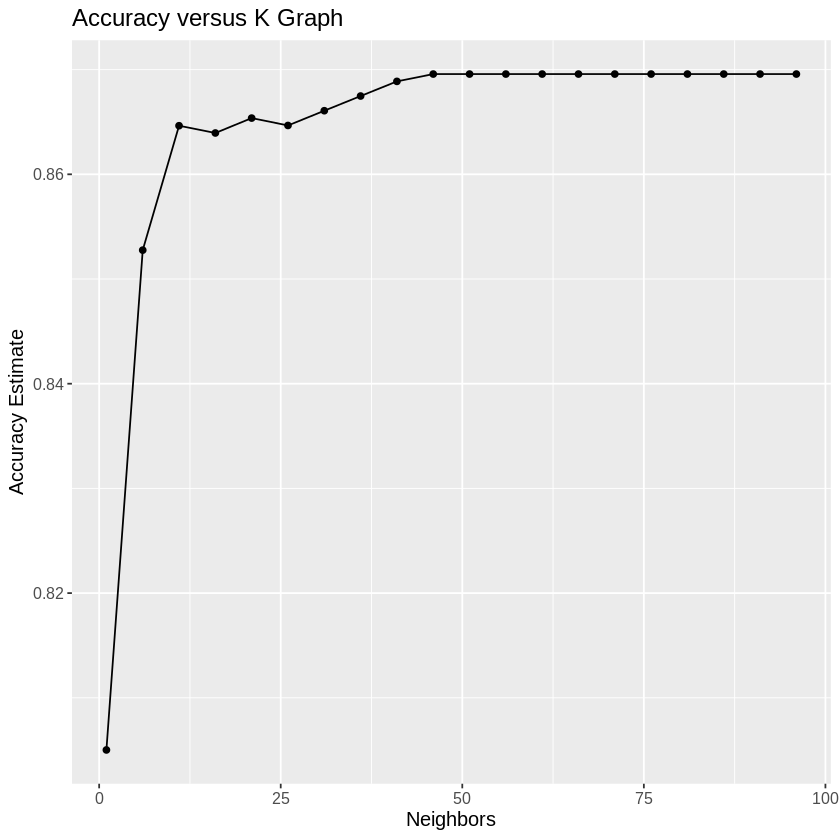

In [56]:
# plotting the accuracy versus K graph to decide the best K value for our data analysis

accurate <- knn_results %>%
  filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accurate, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  ggtitle("Accuracy versus K Graph") +
  theme(text = element_text(size = 12))

accuracy_vs_k

We can see from above accuracy versus K graph, we can see that at values 46, 51, and 56, it has the maximum accuracy. So, we can take 51 as the best K value for data analysis (we can take either of 46, 51, or 56 as the K values. We chose 51 becuase it's the middle value). 

In [71]:
# we will just choose the number K of neighbors to be 51 according to our accuracy versus K graph, 
# and use age, hypertension, heart_disease, and avvg_glucose_level as the predictors. 
# As before we need to create a model specification, combine the model specification and recipe into a workflow, 
# and then finally use fit with the training data stroke_training to build the classifier.

stroke_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 51) %>%
                            set_engine("kknn") %>%
                            set_mode("classification")

stroke_best_fit <- workflow() %>%
                        add_recipe(stroke_recipe) %>%
                        add_model(stroke_best_spec) %>%
                        fit(data = stroke_training)


# We use the bind_cols to add the column of predictions to the original test data, 
# creating the stroke_summary where the stroke variable contains the true stroke, 
# while the .pred_class contains the predicted stroke from the classifier.
# Finally, we can assess our classifier’s accuracy by using the metrics function from tidymodels to get the statistics about the quality of our model, 
# and specifying the truth and estimate arguments as stroke and .pred_class respectively
stroke_summary <- stroke_best_fit %>% 
                       predict(stroke_testing) %>%
                       bind_cols(stroke_testing) %>%
                       metrics(truth = stroke, estimate = .pred_class)

stroke_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8679245
kap,binary,0.0000000


          Truth
Prediction   0   1
         0 414  63
         1   0   0

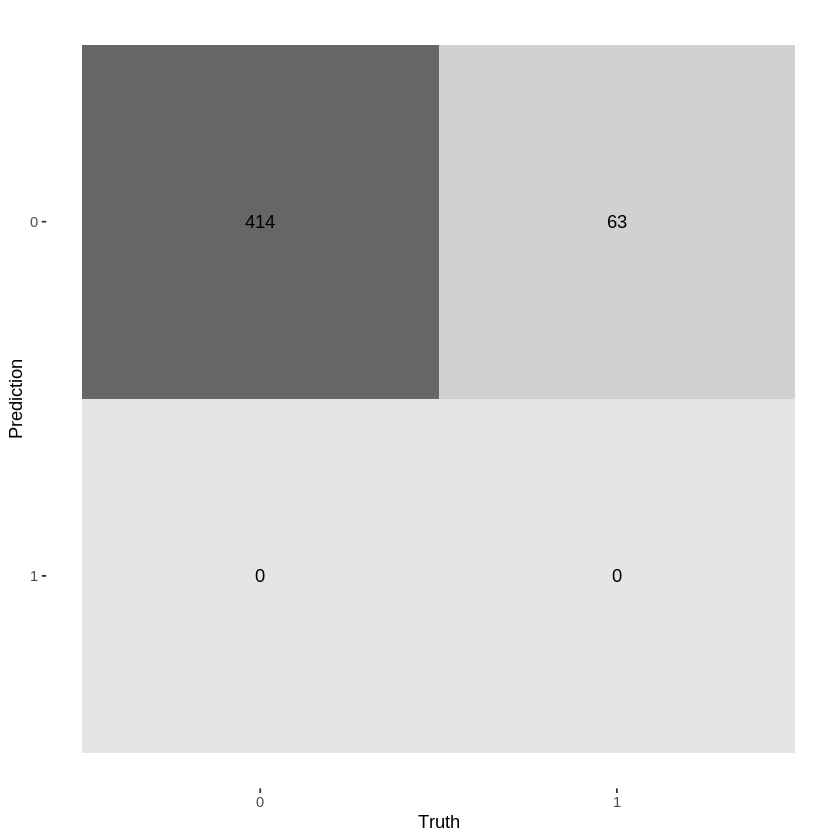

In [72]:
# We can also look at the confusion matrix for the classifier, which shows the table of predicted labels and correct labels, using the conf_mat function
confusion <- stroke_best_fit %>% 
                       predict(stroke_testing) %>%
                       bind_cols(stroke_testing)%>%
                       conf_mat(truth = stroke, estimate = .pred_class)
confusion

# For visualization, we created a conf_plot which is used to visualize the table of predicted labels and correct labels
conf_plot <- autoplot(confusion, type = "heatmap")

conf_plot

The confusion matrix shows 414 observations were correctly predicted as 0 (no stroke), and 0 were correctly predicted as 1 (stroke). Therefore, the classifier labeled 414 + 0 = 414 observations correctly. It also shows that the classifier made some mistakes; in particular, it classified 63 observations as 0 (no stroke) when they were truly 1 (stroke), and 0 observations as 0 (stroke) when they were truly 1 (no stroke).

### **Limitations and Improvements:**

From the confusion matrix, we can see that we have an issue of overfitting with our data analysis. When we decrease the number of neighbors, each individual data point has a stronger influence on nearby points. Here, the classifier becomes unreliable on new data: if we had a different training set, the predictions would be completely different. The model we made is influenced too much by the training data, and it overfits the data. This is due to a significantly greater number of no stroke observations. This imbalanced data leads to an inaccuracy in the prediction, resulting in the classifier predicting the majority category(no stroke) most of the time. As the testing set is also imbalanced, the accuracy estimate calculated using it is high However, that does not guarantee a good prediction in the general population, and the actual accuracy is definitely lower than that.

Overfitting is problematic and will lead to a model that does not generalize well to new data. Therefore, we could improve it by using the step_upsample function. In order to do this, we would add an oversampling step to the earlier knn_recipe with the step_upsample function. It would suffice to rebalance the data by oversampling the 0 (stroke) label variable. In other words, we would replicate 0 (stroke) observations multiple times in our data set to give them more voting power in the K-nearest neighbor algorithm. But there could also be drawbacks of upsampling. Since upsampling duplicates data in both training and testing sets, the test data would have seen the data already before we use it to calculate the accuracy estimate. This could again result in a high accuracy estimate which is not what it actually should be. In conclusion, due to the imbalanced original data, the model we made cannot predict accurately. However, due to time and data limitations this is the best we could do and future studies on stroke should expand on our findings. 

### **Summary**

**The methods we used to perform our analysis from beginning to end**

The overall workflow for performing K-nearest neighbors classification using tidymodels is as follows:

- We used the initial_split function to split the data into a training and test set. 
- Then, we set the strata argument to the stroke label variable and put the test set aside for now.
- Then, we used the vfold_cv function to split up the training data for cross-validation.
- Then, we created a recipe that specifies the stroke label and predictors, as well as preprocessing steps for all variables and pass the training data as the data argument of the recipe.
- Then, we created a nearest_neighbors model specification, with neighbors = tune().
- Then, we added the recipe and model specification to a workflow(), and use the tune_grid function on the train/validation splits to estimate the classifier accuracy for a range of K values.
- Then, we picked the value of K that yields a high accuracy estimate that doesn’t change much if you change K to a nearby value (we got K = 51).
- Then, we made a new model specification for the best parameter value (i.e., for K = 51), and retrain the classifier using the fit function.
- Finally, we evaluated the estimated accuracy of the classifier on the test set using the predict function.

**Describe at least one way that you will visualize the results**

We visualized the results using a plot of confusion matrix where the classifier predicted 414 observations correctly.

### **Discussion:**

**Summarize what you found**

By using the K-nearest neighbor classification algorithm, our model took a participant's age, hypertension and heart disease status, as well as average glucose level to predict whether that patient would get a stroke or not. The accuracy of our model is pretty decent, at a rate of about 87% which we got by using the best K value (K = 51, from our calculations). However, due to limitations which will be discussed shortly, the 87% value is deceptive. 

Firstly, we loaded, then cleaned and wrangled the data by using read_csv function, removed the missing values, and checked the percentage of stroke in the original data respectively. Then, we used the initial_split function to split the data into training and testing sets, and the training data was further split for cross validation with the vfold_cv function. A recipe was made specifying the stroke label and predictors, as well as preprocessing steps for all variables in the training set. In addition to these, the training set was standardized, KNN model and cross validation were applied followed by a workflow to help determine the k value. According to the graph of accuracy estimate vs. k neighbors, we got 46, 51 and 56 as K values that would optimize the accuracy. Consequently, we chose 51 as the k value as it was a good median. We then retrained the classifier with best K value of K = 51, and evaluated the accuracy of the classifier with the testing set.
The accuracy estimate was around 87%, with 414 in 477 correctly predicted and 63 in 475 falsely predicted. Furthermore, 63 of the observations are classified as strokes when there should be no stroke, and inversely, there were no mistakes. 

However, from the confusion matrix, we can see that there is overfitting. This is problematic and will lead to a model that does not generalize well to new data. Therefore, we might improve this by using the step_upsample function and replicating 0 (stroke) observations multiple times in our data set to give them more voting power in the K-nearest neighbor algorithm.

**Discuss whether this is what you expected to find?**

There are limitations to our model due to overfitting. The result is partly what we expected to find, as the accuracy rate reveals that the model we made could predict if a patient is going to have a stroke correctly about 87% of the time. Therefore, the predictors we chose: age, hypertension, heart disease and average glucose level are effective predictor variables and can be used to predict stroke. Hence, the model we made, as well as the k value we chose, are generally reliable in predicting and classifying whether a patient is going to get a stroke or not in the current dataset. However it is not applicable to the general population and further studies can explore this relationship.

**Discuss what impact could such findings have?**

These findings help determine which factors are most prominent in predicting stroke. In reality this model can help doctors understand and predict a patient's heart condition by looking at past reports of age, hypertension, heart disease and average glucose level. These established relationships affords doctors as well as patients the opportunity to be proactive and take prevention practices before stroke actually occurs.

**Discuss what future questions could this lead to?**

Future studies could be made on taking different methods and including a larger sample to improve the model. Further improvement could also be made on including more relevant predictors into the model. Moreover, there might be other factors out there that are related to stroke and we do not know. This could lead to future questions such as:  What lifestyle changes are most effective? Would the findings remain consistent in a different population in another part of the world? What is the most effective way to reduce the chance of a stroke?

### **References:**

Dubow, J., Fink, M.E. Impact of Hypertension on Stroke. Curr Atheroscler Rep 13, 298–305 (2011). https://doi.org/10.1007/s11883-011-0187-y

Fedesoriano. Stroke prediction dataset. Kaggle (2021). https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?select=healthcare-dataset-stroke-data.csv

Soriano-Tárraga, C., Lazcano, U., Jiménez-Conde, J. et al. Biological age is a novel biomarker to predict stroke 
recurrence. J Neurol 268, 285–292 (2021). https://doi.org/10.1007/s00415-020-10148-3